<img alt="Rio" width="100%" src="https://diariodorio.com/wp-content/uploads/2014/07/Praia-de-Botafogo-Foto-Pedro-Kirilos-Riotur-2.jpg">

# Analisando a Violência no Rio de Janeiro

Os homicídios no Brasil representam uma questão nacional de saúde pública, atingindo especialmente moradores das periferias e áreas metropolitanas dos centros urbanos. Nesse cenário, o Rio de Janeiro, como principal pólo turístico nacional, recebe destaque internacional sobretudo devido à guerrilha urbana que ocorrem em seus morros e favelas liderados pelo tráfico.

Atualmente, as leis de acesso à informação e a conscientização dos órgãos públicos, vêm proporcionando a disponibilização de várias fontes de dados.

Como exemplo, o governo do Rio de Janeiro traz a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/), onde faremos uma análise explorando os indicadores estatísticos da violência no Rio, com base nas variáveis fornecidas.

## Obtenção dos Dados


Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

### Importando os dados

In [177]:
# importa os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados


Antes de começarmos a explorar nosso dataset, é preciso saber com o que estamos lidando. Para começarmos a entender melhor esse aspecto, vamos verificar as dimensões do dataset.

In [150]:
# verificar o tamanho do DataFrame
print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0])

Variáveis:  56
Entradas:  344


Agora que já sabemos com a dimensão dos dados com que estamos lidando, vamos verificar que tipo de dados nós temos, verificando as variáveis existentes no nosso conjunto de dados.

In [151]:
# imprimir os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Sabendo com quantas variáveis e linhas estamos lidando, e que tipo de informação vamos encontrar no dataset, é importante analisarmos o tipo de cada variável que temos. 

Esse tipo de informação é bastante útil, e nos ajudará a direcionar nosso trabalho na fase de limpeza dos dados.

In [152]:
# ver os tipos das variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Aqui é interessante notar que todas as variáveis presentes no dataset são do tipo numérico, sejam elas `int` ou `float`.

Com tudo isso em mente, é hora de darmos uma olhada nesse dataset e ver como ele está organizado, como esses dados são apresentados e termos uma ideia do que podemos fazer com eles.

In [153]:
# ver as 5 primeiras entradas do dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


É interessante reparar que algumas variáveis apresentam muitos dados ausentes. Dado o grande intervalo de tempo apresentado no dataset, podemos sugerir algumas hipóteses do que poderia explicar essa ausência, e como podemos contorná-la para continuar explorando o conjunto de dados.

* Como temos dados registrados desde o ano de 1991, alguns desses crimes poderiam não estar sendo contabilizados pelo órgão que coletou esses dados e gerou esse dataset. Estarem ausentes não significa que não existiram, e vamos pensar em formas de lidar com essa ausência logo mais.

* Infelizmente, se tratando de Brasil, se hoje temos uma cultura de dados que ainda deixa a desejar, o que dizer da mesma no período em tela? Devemos levar em consideração também o formato em que esses dados eram registrados à época. Será que foram registrados corretamente e perdidos em períodos de digitalização? Ou será que o gerenciamento dessas informações sempre foi falho?

Antes de decidirmos o que fazer em relação aos dados ausentes, vamos verificar a proporção deles em relação à totalidade do dataset.

In [34]:
# ver os valores faltantes das colunas
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Acima, podemos ver que algumas das variáveis tem valores faltantes em proporções consideráveis como é o exemplo de crimes relacionados a bicicletas e apreensão de drogas.

Como os dados estão estruturados ao longo do tempo, uma forma de realizar uma análise que condiza melhor com a realidade, podemos analisá-los a partir da data em que começaram a ser registrados.

Além disso, existem outras formas de encararmos e explorarmos os dados, como por exemplo:

* Números anuais por crime.
* Números mensais por crime.
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)



### Ajustando o Data Set para as nossas necessidades

Como vimos, temos dados muito antigos e faltantes. Para uma maior relevância da análise, considerando que os dados dos anos 90 podem trazer vícios a análise tanto pela mudança da realidade nacional quanto pela confiabilidade da coleta desses dados num período menos automatizado, vamos separar e filtrar nosso Data Set, mantendo apenas os dados dos últimos 10 anos. 

Nosso estudo fará duas análises mais aprofundadas:

* Crimes Contra o Patrimônio - Veículos
* Crimes Contra a Vida

Dessa forma, nosso novo conjunto de dados só precisará das seguintes colunas:

`mes	hom_doloso	lesao_corp_morte	latrocinio	furto_veiculos	roubo_veiculo	recuperacao_veiculos`

In [154]:
#Inicialmente alterando o index para ano:
df2 = df.set_index('vano')

In [156]:
#separando os dados:
df3 = df2.loc[[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],['mes','hom_doloso','lesao_corp_morte','latrocinio','furto_veiculos','roubo_veiculo','recuperacao_veiculos']]
df3.head()

,mes,hom_doloso,lesao_corp_morte,latrocinio,furto_veiculos,roubo_veiculo,recuperacao_veiculos
vano,,,,,,,
2009,1,551,2.0,13,1789,2573,1883
2009,2,556,4.0,19,1691,2367,1742
2009,3,588,5.0,30,1830,2564,1880
2009,4,542,3.0,27,1759,2310,1788
2009,5,522,0.0,14,1679,2340,1795


In [159]:
#analisando o novo dataset
df3.isnull().sum()/df2.shape[0]

mes                     0.0
hom_doloso              0.0
lesao_corp_morte        0.0
latrocinio              0.0
furto_veiculos          0.0
roubo_veiculo           0.0
recuperacao_veiculos    0.0
dtype: float64

Podemos observar que o novo data set não possui dados faltantes e todas as colunas são numéricas, estando, portanto, apto para seguir a exploração.

### Crimes Contra o Patrimônio - Veículos

Vamos dedicar essa seção do projeto para investigar dados em relação aos crimes de roubo e furto de veículos.

Selecionamos esse topo de delito porque existe um risco baixo de subnotificação, por isso os dados tendem a ser aderentes à realidade. Além disso, trata-se de um problema comum nas grandes metrópoles brasileiras, merecendo destaque em nosso projeto. Como temos dados sobre roubo, furto e recuperação de veículos, conseguimos utilizar essas informações para encontrar resultados pertinentes em relação à situação e ao combate a esse tipo de crime.

In [247]:
#Agrupando os dados por ano
df4 = df3.groupby(df3.index).sum()
df4

,mes,hom_doloso,lesao_corp_morte,latrocinio,furto_veiculos,roubo_veiculo,recuperacao_veiculos
vano,,,,,,,
2009,78,5793,44.0,221,20342,25036,19913
2010,78,4767,50.0,156,18752,20052,16568
2011,78,4279,40.0,118,15593,18773,16142
2012,78,4081,24.0,142,16263,22065,17446
2013,78,4745,39.0,148,17668,28002,21355
2014,78,4942,41.0,152,17683,32651,25227
2015,78,4200,32.0,133,16944,31035,23663
2016,78,5042,56.0,239,16759,41696,28690
2017,78,5346,39.0,237,15708,54366,37630


In [161]:
# ver a média da variável roubo_veiculo
mean_roubo_veiculo = df3.roubo_veiculo.mean()
print(round(mean_roubo_veiculo,2))

2763.95


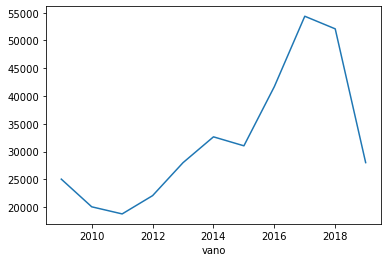

In [191]:
df4.roubo_veiculo.plot.line()

Acima, podemos verificar que a média da variável roubo de veículos é de 2763.95 veículos por mês, mas a evolução do número é preocupante. 
Vale observar que os dados de 2019 se referem **apenas ao primeiro semestre**, por isso a redução acentuada, mas possui a terceira maior média da década, conforme quadro abaixo

In [194]:
df3.groupby(df3.index).mean()

,mes,hom_doloso,lesao_corp_morte,latrocinio,furto_veiculos,roubo_veiculo,recuperacao_veiculos
vano,,,,,,,
2009,6.5,482.750000,3.666667,18.416667,1695.166667,2086.333333,1659.416667
2010,6.5,397.250000,4.166667,13.000000,1562.666667,1671.000000,1380.666667
2011,6.5,356.583333,3.333333,9.833333,1299.416667,1564.416667,1345.166667
2012,6.5,340.083333,2.000000,11.833333,1355.250000,1838.750000,1453.833333
2013,6.5,395.416667,3.250000,12.333333,1472.333333,2333.500000,1779.583333
2014,6.5,411.833333,3.416667,12.666667,1473.583333,2720.916667,2102.250000
2015,6.5,350.000000,2.666667,11.083333,1412.000000,2586.250000,1971.916667
2016,6.5,420.166667,4.666667,19.916667,1396.583333,3474.666667,2390.833333
2017,6.5,445.500000,3.250000,19.750000,1309.000000,4530.500000,3135.833333


In [162]:
# ver a média da variável furto_veiculos
mean_furto_veiculos = df3.furto_veiculos.mean()
print(round(mean_furto_veiculos,2))

1424.36


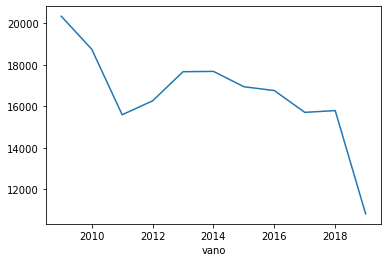

In [193]:
df4.furto_veiculos.plot.line()

Em relação aos furtos, a média de 1424.36 é um pouco menor, mas a tendência é de redução. ou seja, em relação aos veículos, os crimes violentos estão em expansão.

In [163]:
# ver a média da variável recuperacao_veiculos
mean_recuperacao_veiculos = df3.recuperacao_veiculos.mean()
print(round(mean_recuperacao_veiculos,2))

2050.54


In [195]:
# ver a média da variável recuperacao_veiculos
mean_recuperacao_veiculos = df3.recuperacao_veiculos.mean()

# total de veículos perdidos
total = mean_roubo_veiculo + mean_furto_veiculos
print('Média de Veículos Perdidos por Mês: {:.2f} '.format(total))
print('Veículos Recuperados por Mês: {:.2f}'.format(mean_recuperacao_veiculos))

# porcentagem de veículos recuperados
pct = mean_recuperacao_veiculos/total*100

print('{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

Média de Veículos Perdidos por Mês: 4188.30 
Veículos Recuperados por Mês: 2050.54
48.96% dos veículos roubados ou furtados são recuperados.


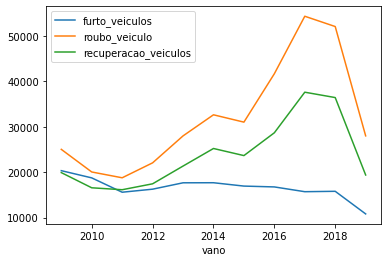

In [208]:
df5 = df4.loc[[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],['furto_veiculos','roubo_veiculo','recuperacao_veiculos']]
df5.plot.line()

O gráfico de recuperação dos veículos acompanha roubos, mostrando uma resposta responsiva, que atua sob demanda, infelizmente, sempre com um gap de veículos não recuperados.

### Crimes Contra a Vida

Abaixo, vamos identificar qual foi o máximo e mínimo registrado para a variável `hom_doloso` ao longo do período observado no dataset.

In [165]:
# valores max e min de hom_doloso
max_hom_doloso = df3.hom_doloso.max()
min_hom_doloso = df3.hom_doloso.min()

# imprimir os valores máximos e mínimos
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	588


Acima podemos ver que no mês com menor número de casos foram registrados 272 homicídios dolosos. 

Em relação ao mês com números mais elevado, houve 588 homicídios dolosos.

Vamos investigar um pouco mais a fundo essas entradas.


In [120]:
# verificando o mês com menor número de homicídios dolosos
df2[df2.hom_doloso == 272]

,mes,hom_doloso,lesao_corp_morte,latrocinio,furto_veiculos,roubo_veiculo,recuperacao_veiculos
vano,,,,,,,
2015,6,272,2.0,16,1333,2254,1768


In [121]:
# verificando o mês com maior número de homicídios dolosos
df2[df2.hom_doloso == 588]

,mes,hom_doloso,lesao_corp_morte,latrocinio,furto_veiculos,roubo_veiculo,recuperacao_veiculos
vano,,,,,,,
2009,3,588,5.0,30,1830,2564,1880


Acima, vemos que o mês de março de 2009 foi o mês com mais casos de homicídios dolosos registrados no nosso dataset, enquanto o posto de mês com menor número de casos foi Junho de 2015.

Isso sugere um bom sinal, indicando que, talvez, o crime venha diminuindo, mas vamos observar o número de casos, incluindo os latrocínios e lesões corporais que se seguiram de morte:

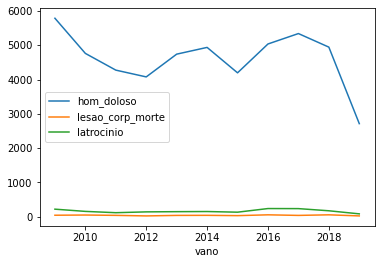

In [223]:
df6 = df4.loc[[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],['hom_doloso','lesao_corp_morte','latrocinio']]
df6.plot.line()

Dessa forma, em que pesem os números obtidos com mínimo e máximo supracitados, o gráfico demonstra uma tendência de estabilidade nos crimes, sempre lembrando que o ano de 2019, que aparentemente está em forte baixa, está incompleto, assim, é interessante plotar um gráfico com a média dos anos.

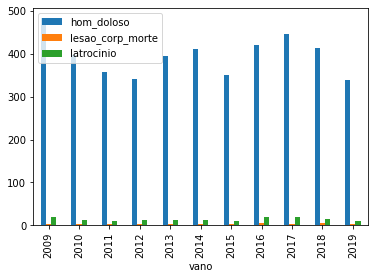

In [228]:
df_CCV = df2.loc[[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],['hom_doloso','lesao_corp_morte','latrocinio']]
x=df_CCV.groupby(df_CCV.index).mean()
x.plot.bar()

Embora se observe uma sutil redução na média de 2019, vemos que não há uma redução significativa. No historgrama abaixo, vemos que a distribuição tende para um número mais reduzido de casos e que os picos acima dos 500 homicídios mês são incomuns.

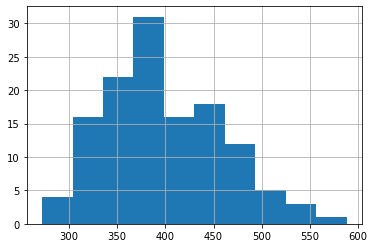

In [229]:
# plotar histograma de hom_doloso
df3.hom_doloso.hist();

### Comparativo com outros países

Pela análise efetuada, vimos que o número de homicídios apresenta uma leve tendência de baixa, enquanto que em relação aos crimes contra o patrimônio a resposta das autoridades tem acompanhado a escalada dos crimes. 

Porém, como o Rio de Janeiro se posiciona em relação a outros locais, no exterior?

No site do Escritório das Nações Unidas para combate às drogas e criminalidade [https://dataunodc.un.org/], coletamos dados de vários países de continentes distintos para efeito de comparação com os dados do estado do Rio de Janeiro. Os dados obtidos se referem ao ano de 2018.


<img alt="Rio" width="30%" src="https://dataunodc.un.org/sites/dataunodc.un.org/files/unodc.jpg">

In [249]:
#criando o dataset com os dados das Nações Unidas
data = pd.DataFrame({'País':["Chile","Portugal",'Argentina','Austrália','Alemanha','França','Rio de Janeiro'],
                     'População':['19,1','10,2','44,9','25,6','83,1','67,7','16,1'],
                     'Total Homicídios':['825','81','2362','222','788','779','4950'],
                     'Homicídios por 100 mil':['4,4',"0,8",'5,3','0,9','0,9','1,2','30,8']})
data

,País,População,Total Homicídios,Homicídios por 100 mil
0,Chile,"19,1",825,"4,4"
1,Portugal,"10,2",81,"0,8"
2,Argentina,"44,9",2362,"5,3"
3,Austrália,"25,6",222,"0,9"
4,Alemanha,"83,1",788,"0,9"
5,França,"67,7",779,"1,2"
6,Rio de Janeiro,"16,1",4950,"30,8"


## Conclusão

Se o estado do Rio de Janeiro fosse um país, os assassinatos em 2018 seriam equivalentes à soma dos homicídios ocorridos nos países listados, com uma população que é uma pequena fração da soma da população desses países. Sua taxa por 100 mil habitantes é de assombrosos 30,8 , cerca de 6 vezes a da argentina, por exemplo.

A violência no Rio, não é novidade e tem sido objeto de manchetes mundo afora, porém os dados tem a capacidade de expor as feridas de forma irrefutável, e espero que possam despertar a população e as autoridades desse torpor que a banalização do crime provoca.